### 1) Imports

In [ ]:
import os
import random
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

### 2) Checking Size Equality of each Image & Equivalent Label

In [23]:
for i in range(1, 21):
    fileName = '\la_' + str(i) + '.nii'
    imageSize = nib.load('.\imagesTr' + fileName).get_fdata().shape
    labelSize = nib.load('.\labelsTr' + fileName).get_fdata().shape
    print('Image ' + str(i) +' Result: ' + str(imageSize == labelSize))

Image 1 Result: True
Image 2 Result: True
Image 3 Result: True
Image 4 Result: True
Image 5 Result: True
Image 6 Result: True
Image 7 Result: True
Image 8 Result: True
Image 9 Result: True
Image 10 Result: True
Image 11 Result: True
Image 12 Result: True
Image 13 Result: True
Image 14 Result: True
Image 15 Result: True
Image 16 Result: True
Image 17 Result: True
Image 18 Result: True
Image 19 Result: True
Image 20 Result: True


*Result:*              
Each Case in Dataset has Equal Sizes of Image and Label.

### 3) Getting Minimum Size Value in All Three Orientations

In [4]:
minimum_width, minimum_height, minimum_depth = float('inf'), float('inf'), float('inf')

for i in range(1, 21):
    fileName = '\la_' + str(i) + '.nii'
    imageData= nib.load('.\imagesTr' + fileName).get_fdata()
    if imageData.shape[0] < minimum_width: minimum_width = imageData.shape[0]
    if imageData.shape[1] < minimum_height: minimum_height = imageData.shape[1]
    if imageData.shape[2] < minimum_depth: minimum_depth = imageData.shape[2]

print('Minimum Width: ' + str(minimum_width))
print('Minimum Height: ' + str(minimum_height))
print('Minimum Depth: ' + str(minimum_depth) )

Minimum Width: 320
Minimum Height: 320
Minimum Depth: 90


### 4) Slicing Image Stack in z to Achieve Equal Size among All Cases

*(All Stacks are Sliced Equally from Up and Down to be of Size 90)*

In [37]:
os.mkdir(os.getcwd() + '/resized_imagesTr')
os.mkdir(os.getcwd() + '/resized_labelsTr')

for i in range(1, 21):
    fileName = '\la_' + str(i) + '.nii'
    image = nib.load('.\imagesTr' + fileName)
    label = nib.load('.\labelsTr' + fileName)
    number_of_cropped_slices = image.shape[2] - 90
    resized_image = image.slicer[:320, :320, number_of_cropped_slices//2:]
    resized_label = label.slicer[:320, :320, number_of_cropped_slices//2:]
    if number_of_cropped_slices != 0:
        resized_image = resized_image.slicer[:320, :320, :-number_of_cropped_slices//2]
        resized_label = resized_label.slicer[:320, :320, :-number_of_cropped_slices//2]
    nib.save(resized_image, os.getcwd() + '/resized_imagesTr/' + fileName[1:])
    nib.save(resized_label, os.getcwd() + '/resized_labelsTr/' + fileName[1:])

#### *Validation:*

In [40]:
print(nib.load('./resized_imagesTr/la_' + str(random.randint(1, 20)) + '.nii').shape)
print(nib.load('./resized_labelsTr/la_' + str(random.randint(1, 20)) + '.nii').shape)

(320, 320, 90)
(320, 320, 90)


*Result:*           
Two Random Image and Labels Files Showing Equal Sizes.

### 5) Saving All Slices in z of One Case

In [41]:
os.mkdir(os.getcwd() + '/case1_slices_in_z')
case1_image_stack = nib.load('./resized_imagesTr/la_1.nii' )
case1_image_stack_data = case1_image_stack.get_fdata()

for i in range(90):
    sliced_image = nib.Nifti1Image(case1_image_stack_data[:, :, i], case1_image_stack.affine, case1_image_stack.header)
    nib.save(sliced_image, os.getcwd() + '/case1_slices_in_z/slice_' + str(i+1) + '_in_z.nii')

In [64]:
def show_slices(slices):
   fig, axes = plt.subplots(1, len(slices), figsize=(10,10))
   for i, slice in enumerate(slices):
       axes[i].imshow(slice.T, cmap="gray", origin="lower")

#### *Validation:*

True


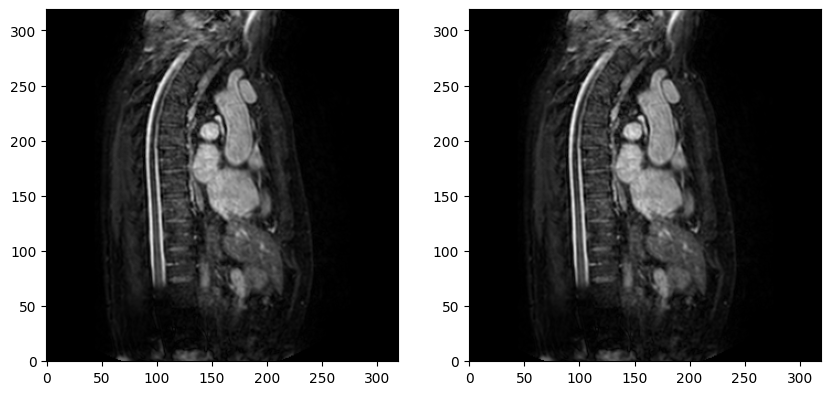

In [76]:
show_slices([nib.load('./resized_imagesTr/la_1.nii').get_fdata()[:, :, 69], nib.load('./case1_slices_in_z/slice_70_in_z.nii').get_fdata()])
print(np.array_equal(nib.load('./resized_imagesTr/la_1.nii').get_fdata()[:, :, 69], nib.load('./case1_slices_in_z/slice_70_in_z.nii').get_fdata())) 

*Result:*              
Slice of Original Image Data Array is the same as its Corresponding Saved Slice File.

### 6) Showing Samples of Image & Label Pairs in 3 Orientations

In [44]:
case1_image_data = nib.load('./resized_imagesTr/la_1.nii' ).get_fdata()
case1_label_data = nib.load('./resized_labelsTr/la_1.nii' ).get_fdata()

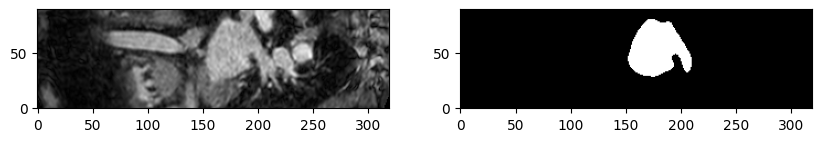

In [66]:
show_slices([case1_image_data[140, :, :], case1_label_data[140, :, :]])

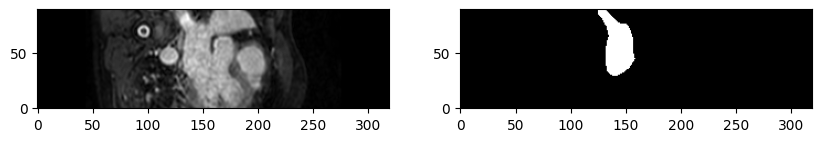

In [67]:
show_slices([case1_image_data[:, 170, :], case1_label_data[:, 170, :]])

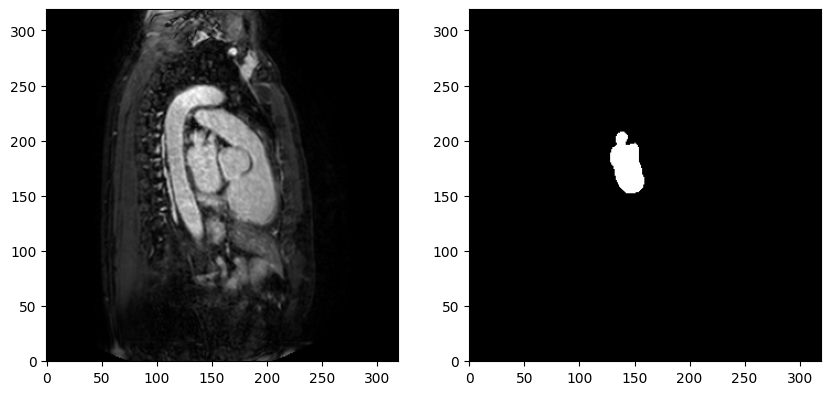

In [68]:
show_slices([case1_image_data[:, :, 50], case1_label_data[:, :, 50]])